## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
train[0].shape

(50000, 32, 32, 3)

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
x_train.shape

(50000, 3072)

In [6]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]]) # 特徵數量 3072
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x) # 輸出10種分類
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()
model.summary()

W0714 03:23:24.986994 14668 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 03:23:25.001991 14668 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 03:23:25.004991 14668 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0714 03:23:25.084963 14668 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0714 03:23:25.091961 14668 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, 
          y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0714 03:23:25.197944 14668 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0714 03:23:25.256921 14668 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 72us/step - loss: 2.2767 - acc: 0.1457 - val_loss: 2.2313 - val_acc: 0.1854
Epoch 2/500
50000/50000 [==============================] - 2s 45us/step - loss: 2.2014 - acc: 0.2079 - val_loss: 2.1731 - val_acc: 0.2319
Epoch 3/500
50000/50000 [==============================] - 2s 46us/step - loss: 2.1464 - acc: 0.2459 - val_loss: 2.1228 - val_acc: 0.2555
Epoch 4/500
50000/50000 [==============================] - 2s 48us/step - loss: 2.0994 - acc: 0.2653 - val_loss: 2.0805 - val_acc: 0.2656
Epoch 5/500
50000/50000 [==============================] - 2s 49us/step - loss: 2.0601 - acc: 0.2797 - val_loss: 2.0445 - val_acc: 0.2846
Epoch 6/500
50000/50000 [==============================] - 2s 46us/step - loss: 2.0271 - acc: 0.2923 - val_loss: 2.0144 - val_acc: 0.2951
Epoch 7/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.9989 - acc: 0.3028 - val_loss: 1.9886 - 

50000/50000 [==============================] - 2s 46us/step - loss: 1.6590 - acc: 0.4236 - val_loss: 1.6628 - val_acc: 0.4173
Epoch 60/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.6560 - acc: 0.4246 - val_loss: 1.6606 - val_acc: 0.4182
Epoch 61/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.6526 - acc: 0.4248 - val_loss: 1.6601 - val_acc: 0.4173
Epoch 62/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.6500 - acc: 0.4273 - val_loss: 1.6551 - val_acc: 0.4221
Epoch 63/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.6475 - acc: 0.4271 - val_loss: 1.6526 - val_acc: 0.4222
Epoch 64/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.6445 - acc: 0.4284 - val_loss: 1.6498 - val_acc: 0.4248
Epoch 65/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.6412 - acc: 0.4293 - val_loss: 1.6476 - val_acc: 0.4240
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.5233 - acc: 0.4687 - val_loss: 1.5438 - val_acc: 0.4605
Epoch 119/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.5213 - acc: 0.4709 - val_loss: 1.5433 - val_acc: 0.4621
Epoch 120/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.5193 - acc: 0.4709 - val_loss: 1.5429 - val_acc: 0.4593
Epoch 121/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.5177 - acc: 0.4715 - val_loss: 1.5451 - val_acc: 0.4584
Epoch 122/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.5162 - acc: 0.4711 - val_loss: 1.5426 - val_acc: 0.4649
Epoch 123/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.5141 - acc: 0.4729 - val_loss: 1.5375 - val_acc: 0.4620
Epoch 124/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.5126 - acc: 0.4739 - val_loss: 1.5354 - val_acc: 0.4634
Epoch 125/500
50000/

50000/50000 [==============================] - 2s 47us/step - loss: 1.4302 - acc: 0.5032 - val_loss: 1.4774 - val_acc: 0.4829
Epoch 177/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.4285 - acc: 0.5036 - val_loss: 1.4763 - val_acc: 0.4818
Epoch 178/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.4271 - acc: 0.5033 - val_loss: 1.4750 - val_acc: 0.4859
Epoch 179/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.4255 - acc: 0.5050 - val_loss: 1.4754 - val_acc: 0.4788
Epoch 180/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.4243 - acc: 0.5054 - val_loss: 1.4797 - val_acc: 0.4797
Epoch 181/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.4226 - acc: 0.5049 - val_loss: 1.4738 - val_acc: 0.4847
Epoch 182/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.4212 - acc: 0.5065 - val_loss: 1.4681 - val_acc: 0.4874
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 2s 47us/step - loss: 1.3498 - acc: 0.5298 - val_loss: 1.4280 - val_acc: 0.4947
Epoch 235/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.3484 - acc: 0.5309 - val_loss: 1.4255 - val_acc: 0.4957
Epoch 236/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.3473 - acc: 0.5320 - val_loss: 1.4291 - val_acc: 0.4947
Epoch 237/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.3464 - acc: 0.5314 - val_loss: 1.4299 - val_acc: 0.4983
Epoch 238/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.3450 - acc: 0.5311 - val_loss: 1.4208 - val_acc: 0.5011
Epoch 239/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.3438 - acc: 0.5328 - val_loss: 1.4242 - val_acc: 0.5007
Epoch 240/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.3423 - acc: 0.5331 - val_loss: 1.4329 - val_acc: 0.4933
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 2s 46us/step - loss: 1.2786 - acc: 0.5529 - val_loss: 1.3901 - val_acc: 0.5068
Epoch 293/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2778 - acc: 0.5555 - val_loss: 1.3856 - val_acc: 0.5053
Epoch 294/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2762 - acc: 0.5539 - val_loss: 1.3864 - val_acc: 0.5133
Epoch 295/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2757 - acc: 0.5548 - val_loss: 1.3919 - val_acc: 0.5063
Epoch 296/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.2742 - acc: 0.5541 - val_loss: 1.3885 - val_acc: 0.5132
Epoch 297/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2729 - acc: 0.5551 - val_loss: 1.3922 - val_acc: 0.5114
Epoch 298/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2713 - acc: 0.5566 - val_loss: 1.3862 - val_acc: 0.5133
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 2s 46us/step - loss: 1.2137 - acc: 0.5765 - val_loss: 1.3593 - val_acc: 0.5208
Epoch 351/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2122 - acc: 0.5761 - val_loss: 1.3691 - val_acc: 0.5114
Epoch 352/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2120 - acc: 0.5774 - val_loss: 1.3627 - val_acc: 0.5153
Epoch 353/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.2104 - acc: 0.5768 - val_loss: 1.3558 - val_acc: 0.5179
Epoch 354/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.2095 - acc: 0.5778 - val_loss: 1.3726 - val_acc: 0.5150
Epoch 355/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2091 - acc: 0.5769 - val_loss: 1.3666 - val_acc: 0.5182
Epoch 356/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.2082 - acc: 0.5783 - val_loss: 1.3618 - val_acc: 0.5180
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 2s 47us/step - loss: 1.1535 - acc: 0.5974 - val_loss: 1.3529 - val_acc: 0.5194
Epoch 409/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.1519 - acc: 0.5974 - val_loss: 1.3401 - val_acc: 0.5248
Epoch 410/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.1507 - acc: 0.5973 - val_loss: 1.3513 - val_acc: 0.5184
Epoch 411/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.1491 - acc: 0.5982 - val_loss: 1.3716 - val_acc: 0.5158
Epoch 412/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1485 - acc: 0.5996 - val_loss: 1.3611 - val_acc: 0.5215
Epoch 413/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.1487 - acc: 0.5988 - val_loss: 1.3469 - val_acc: 0.5214
Epoch 414/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.1470 - acc: 0.5990 - val_loss: 1.3872 - val_acc: 0.5125
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 2s 47us/step - loss: 1.0950 - acc: 0.6184 - val_loss: 1.3882 - val_acc: 0.5120
Epoch 467/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0937 - acc: 0.6190 - val_loss: 1.3924 - val_acc: 0.5143
Epoch 468/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.0918 - acc: 0.6201 - val_loss: 1.3431 - val_acc: 0.5282
Epoch 469/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0908 - acc: 0.6192 - val_loss: 1.3483 - val_acc: 0.5289
Epoch 470/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.0922 - acc: 0.6184 - val_loss: 1.3707 - val_acc: 0.5195
Epoch 471/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.0932 - acc: 0.6187 - val_loss: 1.3590 - val_acc: 0.5213
Epoch 472/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.0896 - acc: 0.6197 - val_loss: 1.3477 - val_acc: 0.5218
Epoch 473/500
50000/50000 [=======

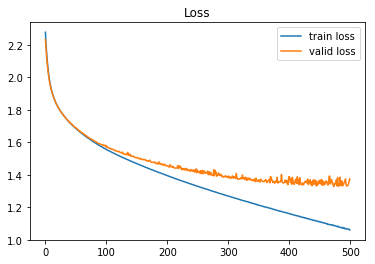

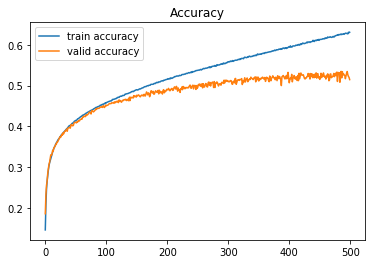

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()